# NAO example notebook

This notebook contains an example of access of ERA5 data with the `Teleconnection` class and evaluation of the NAO teleconnection (station based index) with `aqua` libraries and an example of the plotting routines.

In [1]:
from teleconnections.tc_class import Teleconnection
import datetime

FDB5 binary library not present on system, disabling FDB support.


## Teleconnection details configuration

To run a teleconnection analysis, we only need to specify the teleconnection name and the catalog entry to be loaded by the `Reader` inside the class.

Details such as teleconnection coordinates, folder input/output are obtained with functions collected in the `tools.py` file, that access details from a `yaml` file.
The function `load_namelist` loads data specific to the choosen teleconnection such as coordinates.
In the class version, all this is happening in the `__init__` method.

In [2]:
telecname = 'NAO'
model = 'ERA5'
exp = 'era5'
source = 'monthly'

## Initialize the class

Data required for the NAO teleconnection are retrieved with the `Reader` class from the `AQUA` framework in the `__init__` method of the class.

In [3]:
telec = Teleconnection(model=model, exp=exp, source=source, telecname=telecname, loglevel='INFO')

2023-06-28 16:32:07 :: Teleconnection :: INFO     -> Namelist loaded
2023-06-28 16:32:13 :: Teleconnection :: INFO     -> Reader initialized


## Complete analysis run

The data are not retrieved yet, but they will be retrieved automatically with the index evaluation.
The most compact way of performing the teleconnection analysis is to use the `run` method of the class.

In [4]:
telec.run()

2023-06-28 16:33:19 :: Reader :: INFO     -> Retrieving variables: ['msl']
2023-06-28 16:33:20 :: Reader :: INFO     -> msl: Pa --> Pa
2023-06-28 16:33:20 :: Teleconnection :: INFO     -> Data retrieved
2023-06-28 16:33:20 :: Teleconnection :: INFO     -> Data regridded
2023-06-28 16:33:20 :: station based index :: INFO     -> Evaluating station based index for NAO
/work/bb1153/b382289/mambaforge/envs/teleconnections/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 83 times more chunks
  return self.array[key]
2023-06-28 16:33:21 :: station based index :: INFO     -> Data longitudes are 0-360, converting teleconnection coords
2023-06-28 16:33:21 :: station based index :: INFO     -> Station 1: lon = 334.3, lat = 37.7
2023-06-28 16:33:21 :: station based index :: INFO     -> Station 2: lon = 338, lat = 64.1
2023-06-28 16:33:52 :: station based index :: INFO     -> Index evaluated
2023-06-28 16:33:52 :: Regres

At the end of the `run` method, the data are saved in teleconnection class attributes.

In [5]:
telec.data # retrieved original data

<xarray.Dataset>
Dimensions:  (time: 996, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    msl      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

In [6]:
telec.index # evaluated NAO index

<xarray.DataArray 'index' (time: 994)>
dask.array<getitem, shape=(994,), dtype=float64, chunksize=(3,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1940-02-01 1940-03-01 ... 2022-11-01
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 1 ... 1 2 3 4 5 6 7 8 9 10 11
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          Pa
    code:           151
    table:          128
    history:        2023-06-28 16:33:20 variable renamed by AQUA fixer;\n
    paramId:        151
    cfVarName:      msl
    shortName:      msl
    regridded:      1

In [7]:
telec.regression # regression map

<xarray.DataArray (lat: 180, lon: 360)>
array([[ -29.43590254,  -29.42608707,  -29.41341333, ...,  -29.4465328 ,
         -29.44276854,  -29.43877746],
       [ -28.32831132,  -28.33830556,  -28.34944457, ...,  -28.29119958,
         -28.3029988 ,  -28.31530995],
       [ -26.3871647 ,  -26.40121905,  -26.40201655, ...,  -26.25277658,
         -26.29409697,  -26.33768062],
       ...,
       [-251.81256595, -251.70754182, -251.59579586, ..., -252.00532574,
        -251.94501934, -251.882137  ],
       [-249.25559777, -249.17140779, -249.08207267, ..., -249.42704946,
        -249.37225862, -249.31669551],
       [-246.13206675, -246.0901743 , -246.04704499, ..., -246.23957621,
        -246.2047284 , -246.16932874]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

In [8]:
telec.correlation # correlation map

<xarray.DataArray (lat: 180, lon: 360)>
array([[-0.0443418 , -0.04435511, -0.04436879, ..., -0.04430263,
        -0.04431507, -0.04432776],
       [-0.04206059, -0.04207607, -0.04209114, ..., -0.0419859 ,
        -0.04200604, -0.04203347],
       [-0.03932316, -0.0394283 , -0.03954243, ..., -0.03906422,
        -0.0391494 , -0.0392383 ],
       ...,
       [-0.39487312, -0.3944838 , -0.39407545, ..., -0.39592904,
        -0.3955945 , -0.39524181],
       [-0.37965474, -0.37939179, -0.37911831, ..., -0.38036639,
        -0.38013982, -0.37990298],
       [-0.3651301 , -0.36500946, -0.36488607, ..., -0.36546889,
        -0.36536   , -0.36524729]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

## Index evaluation

The NAO index can be evaluated by using the library function `station_based_index` from the `index.py` file.
The index can be evaluated with a custom rolling window to average data (standard is 3 months, it can be specified as argument while initializing the Teleconnection class).

In [9]:
telec.evaluate_index()

2023-06-28 16:37:28 :: station based index :: INFO     -> Evaluating station based index for NAO
/work/bb1153/b382289/mambaforge/envs/teleconnections/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 83 times more chunks
  return self.array[key]
2023-06-28 16:37:28 :: station based index :: INFO     -> Data longitudes are 0-360, converting teleconnection coords
2023-06-28 16:37:28 :: station based index :: INFO     -> Station 1: lon = 334.3, lat = 37.7
2023-06-28 16:37:28 :: station based index :: INFO     -> Station 2: lon = 338, lat = 64.1
2023-06-28 16:37:54 :: station based index :: INFO     -> Index evaluated


Index can be plot with an internal function:

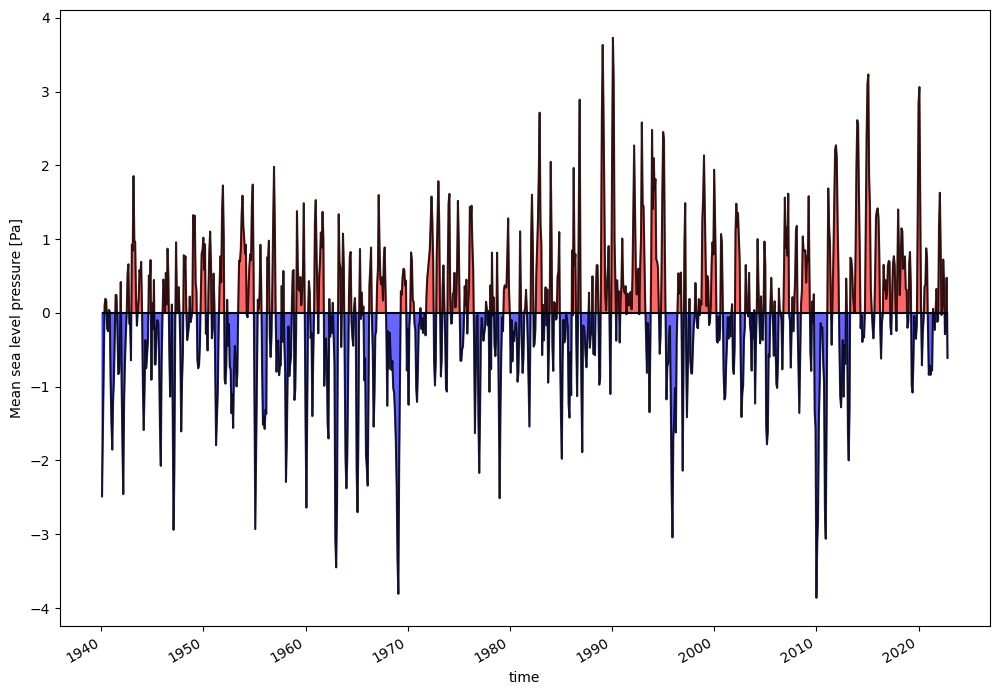

In [10]:
telec.plot_index()

## Regression map

Also in this case, a specific method of the class is available to evaluate the regression map.

In [11]:
telec.evaluate_regression()

2023-06-28 16:40:05 :: Regression :: INFO     -> Computing regression


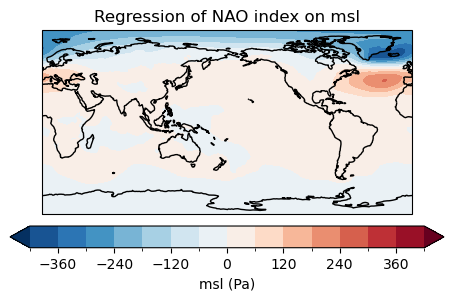

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# plot
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

lon ,lat = telec.data.lon , telec.data.lat

# plot regression
c = telec.regression.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='RdBu_r', levels=15, add_colorbar=False,
                                   add_labels=False, extend='both')

# add coastlines
ax.coastlines()

# add colorbar
cbar = plt.colorbar(c, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label('msl (Pa)')

# add title
plt.title('Regression of NAO index on msl')

plt.show()

## Comparison with NCAR data

With the NAO index computed, we can compare with observational data from NCAR, to check if the index is computed correctly.

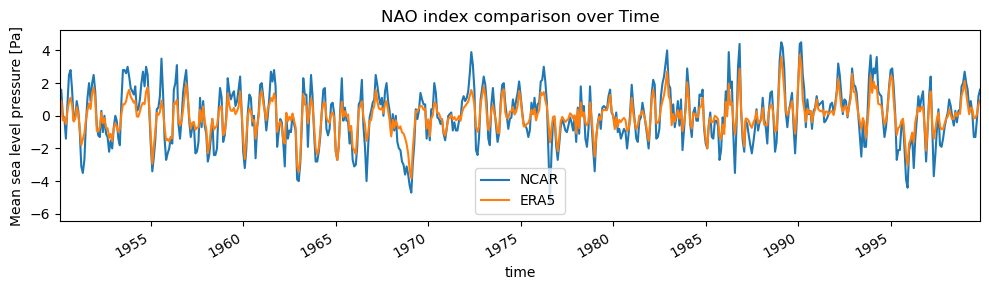

In [23]:
import numpy as np
import xarray as xr

ncar_path = '../data/nao_station_seasonal.txt'
nao_ncar = np.genfromtxt(ncar_path,skip_header=3,skip_footer=4)

year = nao_ncar[:,0]
month_data = nao_ncar[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='MS',calendar='standard')
month_data = month_data.reshape(-1)
nao_ncar = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')

time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
fig = plt.figure(figsize=(10,3))
plt.plot(datetimes, nao_ncar.values,label='NCAR')

plt.xlim(datetime.datetime(1950, 1, 31, 0, 0),datetime.datetime(1999, 10, 31, 0, 0))

telec.index.plot(label='ERA5')
plt.legend()
plt.title('NAO index comparison over Time')
fig.tight_layout()

plt.show()